# Import, scan, and clean data

Data should be relatively clean but it is nice to know what we are working with.

Additionally, there are 3 datasets given to us via our Kaggle page for flights. We'd like to know how all 3 relate to each other, and whether some can be combined or ignored

In [2]:
#Import Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#import sklearn, etc.

In [83]:
#import datasets as Pandas dataframes
#NOTE: the filepath may be different for each user
main_dataset = pd.read_csv('Datasets/Clean_Dataset.csv')
business_df = pd.read_csv('Datasets/business.csv')
economy_df = pd.read_csv('Datasets/economy.csv')

In [5]:
main_dataset.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [6]:
print(list(main_dataset.columns))
print(main_dataset.shape)

['Unnamed: 0', 'airline', 'flight', 'source_city', 'departure_time', 'stops', 'arrival_time', 'destination_city', 'class', 'duration', 'days_left', 'price']
(300153, 12)


In [7]:
business_df.head()

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price
0,11-02-2022,Air India,AI,868,18:00,Delhi,02h 00m,non-stop,20:00,Mumbai,"25,612"
1,11-02-2022,Air India,AI,624,19:00,Delhi,02h 15m,non-stop,21:15,Mumbai,"25,612"
2,11-02-2022,Air India,AI,531,20:00,Delhi,24h 45m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,20:45,Mumbai,"42,220"
3,11-02-2022,Air India,AI,839,21:25,Delhi,26h 30m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,23:55,Mumbai,"44,450"
4,11-02-2022,Air India,AI,544,17:15,Delhi,06h 40m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,23:55,Mumbai,"46,690"


In [8]:
print(list(business_df.columns))
print(business_df.shape)

['date', 'airline', 'ch_code', 'num_code', 'dep_time', 'from', 'time_taken', 'stop', 'arr_time', 'to', 'price']
(93487, 11)


In [9]:
economy_df.head()

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price
0,11-02-2022,SpiceJet,SG,8709,18:55,Delhi,02h 10m,non-stop,21:05,Mumbai,"5,953"
1,11-02-2022,SpiceJet,SG,8157,06:20,Delhi,02h 20m,non-stop,08:40,Mumbai,"5,953"
2,11-02-2022,AirAsia,I5,764,04:25,Delhi,02h 10m,non-stop,06:35,Mumbai,"5,956"
3,11-02-2022,Vistara,UK,995,10:20,Delhi,02h 15m,non-stop,12:35,Mumbai,"5,955"
4,11-02-2022,Vistara,UK,963,08:50,Delhi,02h 20m,non-stop,11:10,Mumbai,"5,955"


In [10]:
print(list(economy_df.columns))
print(economy_df.shape)

['date', 'airline', 'ch_code', 'num_code', 'dep_time', 'from', 'time_taken', 'stop', 'arr_time', 'to', 'price']
(206774, 11)


In [11]:
206774+93487

300261

In [12]:
business_df.loc[business_df['price'] == '25,612']

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price
0,11-02-2022,Air India,AI,868,18:00,Delhi,02h 00m,non-stop,20:00,Mumbai,"25,612"
1,11-02-2022,Air India,AI,624,19:00,Delhi,02h 15m,non-stop,21:15,Mumbai,"25,612"
35,12-02-2022,Air India,AI,868,18:00,Delhi,02h 00m,non-stop,20:00,Mumbai,"25,612"
36,12-02-2022,Air India,AI,887,07:00,Delhi,02h 05m,non-stop,09:05,Mumbai,"25,612"
37,12-02-2022,Air India,AI,665,08:00,Delhi,02h 10m,non-stop,10:10,Mumbai,"25,612"
38,12-02-2022,Air India,AI,805,20:00,Delhi,02h 10m,non-stop,22:10,Mumbai,"25,612"
39,12-02-2022,Air India,AI,678,09:00,Delhi,02h 15m,non-stop,11:15,Mumbai,"25,612"
40,12-02-2022,Air India,AI,624,19:00,Delhi,02h 15m,non-stop,21:15,Mumbai,"25,612"
41,12-02-2022,Air India,AI,636,14:30,Delhi,03h 30m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia IDR\n\t\t\...,18:00,Mumbai,"25,612"
42,12-02-2022,Air India,AI,441,17:50,Delhi,03h 45m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia IXU\n\t\t\...,21:35,Mumbai,"25,612"


In [13]:
main_dataset.loc[main_dataset['price'] == 25612]

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
206666,206666,Air_India,AI-868,Delhi,Evening,zero,Evening,Mumbai,Business,2.00,1,25612
206667,206667,Air_India,AI-624,Delhi,Evening,zero,Night,Mumbai,Business,2.25,1,25612
206701,206701,Air_India,AI-868,Delhi,Evening,zero,Evening,Mumbai,Business,2.00,2,25612
206702,206702,Air_India,AI-887,Delhi,Early_Morning,zero,Morning,Mumbai,Business,2.08,2,25612
206703,206703,Air_India,AI-665,Delhi,Early_Morning,zero,Morning,Mumbai,Business,2.17,2,25612
206704,206704,Air_India,AI-805,Delhi,Evening,zero,Night,Mumbai,Business,2.17,2,25612
206705,206705,Air_India,AI-678,Delhi,Morning,zero,Morning,Mumbai,Business,2.25,2,25612
206706,206706,Air_India,AI-624,Delhi,Evening,zero,Night,Mumbai,Business,2.25,2,25612
206707,206707,Air_India,AI-636,Delhi,Afternoon,one,Evening,Mumbai,Business,3.50,2,25612
206708,206708,Air_India,AI-441,Delhi,Evening,one,Night,Mumbai,Business,3.75,2,25612


In [14]:
len(main_dataset.loc[main_dataset['price'] == 25612]) == len(business_df.loc[business_df['price'] == '25,612'])

True

We can see that the cleaned dataset is a combination of the business and economy class flights with a few modifications (~100 dropped flights, prices converted from strings to ints, etc.).

However, there are some immediate, glaring issues that should be taken care of:
 - We need to drop the unnamed column
 - We should convert the 'stops' (number of stops per flight) from categorical data to numerical data
 - We should fix some of the names for better readability (e.g. 'days_left' refers to number of days between booking and vacation, but this isn't obvious)
 
 Additionally, for quality of life, we may drop some columns we are less interested in working with. This would be done in a new dataframe, however, and will likely be done after we find some sort of test metric for usability (for example, we do not expect flight serial number to be a good predictor of price).

In [15]:
main_dataset = main_dataset.drop(columns = ['Unnamed: 0'])

In [16]:
print(main_dataset['stops'].unique())
def strtonum(ele):
    if ele == 'zero':
        num = 0
            
    elif ele == 'one':
        num = 1
            
    else:
        num = 2
            
    return num

main_dataset['stops'] = main_dataset['stops'].apply(strtonum)

['zero' 'one' 'two_or_more']


In [17]:
#main_dataset['days_left'] = main_dataset['days_left'].rename('hi') when we think of a name
main_dataset.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,0,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,0,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,0,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,0,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,0,Morning,Mumbai,Economy,2.33,1,5955


In [18]:
main_dataset.isnull().any()

airline             False
flight              False
source_city         False
departure_time      False
stops               False
arrival_time        False
destination_city    False
class               False
duration            False
days_left           False
price               False
dtype: bool

## Exploratory Data Analysis

With all cleaning done, we'd like to begin looking at what features of the data might be good predictors of other features (in particular, we'd like to see which features correlate well with price)

We can do this in the following ways:
 - Correlation Matrices (only works with integer data)
 - Linear Regression (also only works with integer data)
 - Multi-class scattar plots (allows us to compare two features (e.g. price and duration) with categorical data (e.g. airline))

Still need to figure out better ways of comparing/predicting integer data (price) using categorical data

Also, we have a lot of data, so figures get very overcomplicated very fast. We should stick to percentages whenever possible (like in corr matrices)

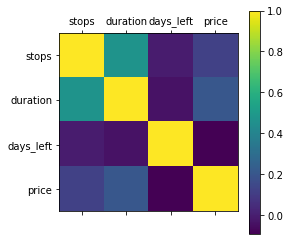

In [19]:
data_scalars_only = main_dataset[['stops', 'duration', 'days_left', 'price']]
corr_mat = data_scalars_only.corr()
plt.matshow(corr_mat) #not sure how to change figure size, corr matrix is kind of strange to work with
plt.xticks(range(data_scalars_only.shape[1]), data_scalars_only.columns) #optional: rotation=45
plt.yticks(range(data_scalars_only.shape[1]), data_scalars_only.columns)
plt.colorbar()

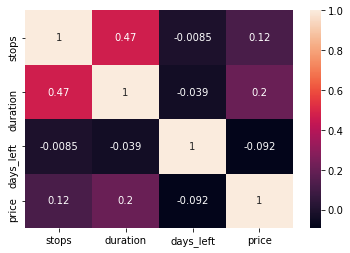

In [20]:
sns.heatmap(corr_mat, annot=True)
plt.show()
#works better because we can see numbers
#duration and stops have high correlation; makes sense
#highest correlation is only a 0.2 with price: duration and price

In [21]:
main_dataset['stops']

0         0
1         0
2         0
3         0
4         0
         ..
300148    1
300149    1
300150    1
300151    1
300152    1
Name: stops, Length: 300153, dtype: int64

<AxesSubplot:xlabel='price', ylabel='duration'>

/opt/conda/lib/python3.9/site-packages/IPython/core/pylabtools.py:134: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


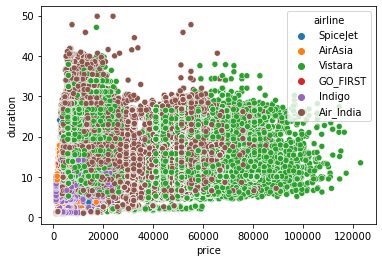

In [22]:
sns.scatterplot(data=main_dataset, x='price', y='duration', hue='airline') #oh dear god we have too much data
#can already see a slight trend: Vistara seems to be most expensive, Indigo the cheapest, Air india the longest flights on average

In [69]:
main_dataset['airline'].value_counts()
# Noted in Aditi's EDA

Vistara      127859
Air_India     80892
Indigo        43120
GO_FIRST      23173
AirAsia       16098
SpiceJet       9011
Name: airline, dtype: int64

Separating out points for all the airlines:

[Text(0.5, 1.0, 'SpiceJet price vs. duration')]

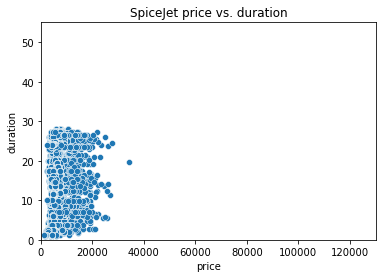

In [72]:
pl1 = sns.scatterplot(data=main_dataset.loc[main_dataset['airline'] == 'SpiceJet'], x='price', y='duration')
pl1.set_ylim(0, 55)
pl1.set_xlim(0, 130000)
pl1.set(title='SpiceJet price vs. duration')

[Text(0.5, 1.0, 'AirAsia price vs. duration')]

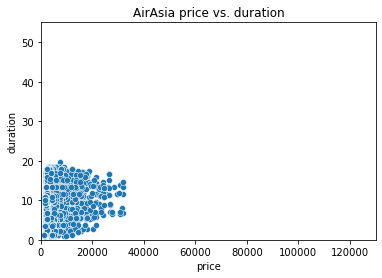

In [73]:
pl2 = sns.scatterplot(data=main_dataset.loc[main_dataset['airline'] == 'AirAsia'], x='price', y='duration', palette=['orange'])
pl2.set_ylim(0, 55)
pl2.set_xlim(0, 130000)
pl2.set(title='AirAsia price vs. duration')

[Text(0.5, 1.0, 'Vistara price vs. duration')]

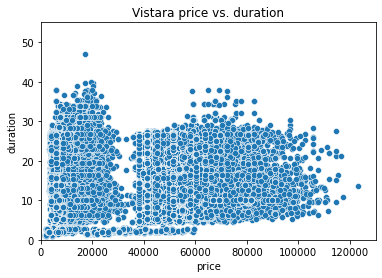

In [74]:
pl3 = sns.scatterplot(data=main_dataset.loc[main_dataset['airline'] == 'Vistara'], x='price', y='duration')
pl3.set_ylim(0, 55)
pl3.set_xlim(0, 130000)
pl3.set(title='Vistara price vs. duration')

[Text(0.5, 1.0, 'GO FIRST price vs. duration')]

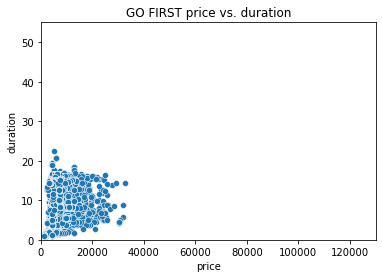

In [77]:
pl4 = sns.scatterplot(data=main_dataset.loc[main_dataset['airline'] == 'GO_FIRST'], x='price', y='duration')
pl4.set_ylim(0, 55)
pl4.set_xlim(0, 130000)
pl4.set(title='GO FIRST price vs. duration')

[Text(0.5, 1.0, 'Indigo price vs. duration')]

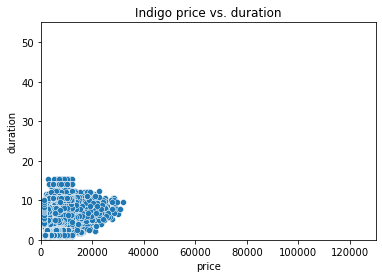

In [76]:
pl5 = sns.scatterplot(data=main_dataset.loc[main_dataset['airline'] == 'Indigo'], x='price', y='duration')
pl5.set_ylim(0, 55)
pl5.set_xlim(0, 130000)
pl5.set(title='Indigo price vs. duration')

[Text(0.5, 1.0, 'Air India price vs. duration')]

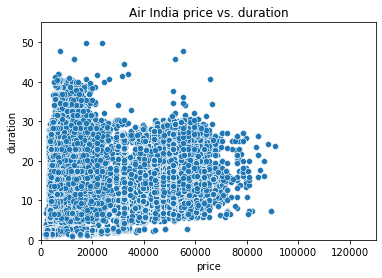

In [78]:
pl6 = sns.scatterplot(data=main_dataset.loc[main_dataset['airline'] == 'Air_India'], x='price', y='duration')
pl6.set_ylim(0, 55)
pl6.set_xlim(0, 130000)
pl6.set(title='Air India price vs. duration')

Looking at these separated scatterplots, it seems that AirAsia, Go First, and Indigo are all quite similar in terms of both price and duration, with SpiceJet being similar in terms of price but with more longer-duration flights than the other three. It may also be worth noting that the plot of Vistara flights (and, to a lesser degree, Air India flights) seems to form three clusters.

Text(0.5, 1.0, 'Vistara')

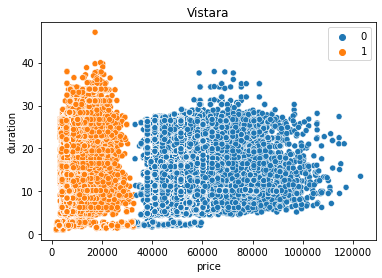

In [97]:
from sklearn.cluster import KMeans

vis = main_dataset.loc[main_dataset['airline'] == 'Vistara'][['price', 'duration']]
kmeans = KMeans(n_clusters=2).fit_predict(vis)
sns.scatterplot(data=main_dataset.loc[main_dataset['airline'] == 'Vistara'], x='price', y='duration', hue=kmeans)
plt.title('Vistara')

Text(0.5, 1.0, 'Air India')

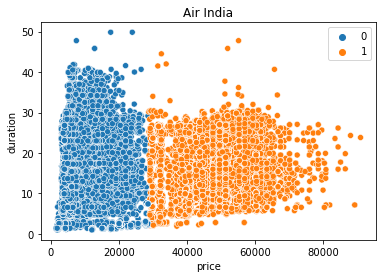

In [98]:
airin = main_dataset.loc[main_dataset['airline'] == 'Air_India'][['price', 'duration']]
kmeans2 = KMeans(n_clusters=2).fit_predict(airin)
sns.scatterplot(data=main_dataset.loc[main_dataset['airline'] == 'Air_India'], x='price', y='duration', hue=kmeans2)
plt.title('Air India')
# this is less obvious

..Is there a way to get the third cluster (at the bottom) to show up as well because this aint it

<AxesSubplot:xlabel='price', ylabel='duration'>

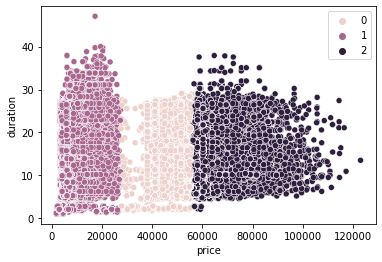

In [91]:
from sklearn.cluster import KMeans

vis = main_dataset.loc[main_dataset['airline'] == 'Vistara'][['price', 'duration']]
kmeans = KMeans(n_clusters=3).fit_predict(vis)
sns.scatterplot(data=main_dataset.loc[main_dataset['airline'] == 'Vistara'], x='price', y='duration', hue=kmeans)